Urban Data Science & Smart Cities 
URSP688Y Spring 2025
Instructor: Chester Harvey 
Urban Studies & Planning 
National Center for Smart Growth 
University of Maryland

Name: Nancy Bowne 
Final Project

Part B: Choropleth Map 

My project will assess food distribution in Washington, D.C., exploring if food waste and food insecurity can reach an equilibrium to properly provide for the population.

I will collect information on the duration of each grocery store's existence in D.C., to measure if there has been a proper distribution of grocery stores over time. This step aims to learn if the city is making progress to mitigate food deserts, and where are new grocery stores going (prove/disprove Hotelling principle- stores try to agglomerate in spaces in order to steal markets)

    1. Use store_locations_csv_df to track grocery store locations from 1990- 2025 using variables PRESENT90- PRESENT25
    2. Create a choropleth graph to contrast colors over time of grocery store access in D.C. 
    3. Sort grocery stores by type, location, size 
    4. Manage blank and NA values for unknown duration-creation of a grocery store in D.C. (in dataset, appears blank) 


In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os
#import contextily as cx
import matplotlib as mpl


In [2]:
# Load datasets and make sure zip codes are stored as strings without decimals

store_locations_csv_df = pd.read_csv('/Users/NancyBowne/Downloads/Grocery_Store_Locations.csv')
store_locations_csv_df['ZIPCODE'] = store_locations_csv_df['ZIPCODE'].astype('Int64').astype('string')
#print (store_locations_csv_df)


In [3]:
# How many store locations?
len(store_locations_csv_df) 


91

In [4]:
low_food_area_csv_df = pd.read_csv('/Users/NancyBowne/Downloads/Low_Food_Access_Areas.csv')
#low_food_area_csv_df['ZIPCODE'] = low_food_area_csv_df['ZIPCODE'].astype('Int64').astype('string')
#print (low_food_area_csv_df)


In [5]:
#Upload json version of store_location_history & tracts dataset
crs = 26918 # UTM18
store_location_history = gpd.read_file("/Users/NancyBowne/Downloads/Grocery_Store_Locations.geojson").to_crs(crs)
#print(store_locations_json_gdf)

tracts = gpd.read_file("/Users/NancyBowne/Downloads/dc_tracts.geojson").to_crs(crs)
# Restrict to tract-level features, which have geoids 18 characters long
tracts = tracts[tracts.geoid.str.len() == 18]


In [66]:
tracts.head(10) #to check variables 

,name,B01003001,"B01003001, Error",geometry,count_yes,count_no,count_blank
geoid,,,,,,,
14000US11001000101,"Census Tract 1.01, District of Columbia, DC",1097.0,223.0,"MULTIPOLYGON (((321636.127 4308861.279, 321646...",3.0,0.0,16.0
14000US11001000102,"Census Tract 1.02, District of Columbia, DC",3127.0,474.0,"MULTIPOLYGON (((320559.301 4307779.45, 320608....",17.0,2.0,0.0
14000US11001000201,"Census Tract 2.01, District of Columbia, DC",2384.0,35.0,"MULTIPOLYGON (((319722.929 4309141.752, 319744...",0.0,0.0,0.0
14000US11001000202,"Census Tract 2.02, District of Columbia, DC",3919.0,461.0,"MULTIPOLYGON (((319647.92 4308298.985, 319649....",11.0,8.0,0.0
14000US11001000300,"Census Tract 3, District of Columbia, DC",5979.0,782.0,"MULTIPOLYGON (((319453.267 4310093.769, 319459...",0.0,0.0,0.0
14000US11001000400,"Census Tract 4, District of Columbia, DC",1652.0,331.0,"MULTIPOLYGON (((320287.465 4310786.758, 320288...",21.0,2.0,15.0
14000US11001000501,"Census Tract 5.01, District of Columbia, DC",3594.0,465.0,"MULTIPOLYGON (((321495.234 4309725.584, 321500...",0.0,0.0,0.0
14000US11001000502,"Census Tract 5.02, District of Columbia, DC",3384.0,524.0,"MULTIPOLYGON (((320884.458 4311145.747, 320886...",0.0,0.0,0.0
14000US11001000600,"Census Tract 6, District of Columbia, DC",4548.0,564.0,"MULTIPOLYGON (((320036.85 4312414.464, 320080....",0.0,0.0,0.0


In [7]:
#View variables of store_location_history

store_location_history.columns.tolist()

store_location_history.head(10)

,STORENAME,ADDRESS,ZIPCODE,PHONE,WARD,SSL,NOTES,PRESENT90,PRESENT95,PRESENT00,...,GIS_ID,XCOORD,YCOORD,MAR_ID,SE_ANNO_CAD_DATA,GLOBALID,CREATED,EDITED,OBJECTID,geometry
0,Target,7828 GEORGIA AVENUE NW,20012,2.028924e+09,Ward 4,2960 0017,None,None,None,None,...,GroceryStorePt_1,397662.57,146280.07,300512,None,{CE302122-4E8D-4DC7-845B-06563B993F66},2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,641,POINT (324433.836 4317005.729)
1,International Progresso Market,7719 GEORGIA AVENUE NW,20012,2.025455e+09,Ward 4,2961 0810,None,None,None,None,...,GroceryStorePt_2,397741.80,146169.97,285417,None,{2C18863D-40DE-4F66-AA59-46F1C65D67F2},2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,642,POINT (324510.63 4316893.912)
2,Jocelyn’s Market,6404 GEORGIA AVENUE NW,20012,2.027228e+09,Ward 4,2945 0839,None,None,None,None,...,GroceryStorePt_3,397591.16,144428.00,285334,None,{A0B448C3-B3FB-49FE-B8BF-1FEBA3CEA642},2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,643,POINT (324321.763 4315155.623)
3,Magruder's,5626 CONNECTICUT AVENUE NW,20015,2.024645e+09,Ward 3,1860 0013,,Yes,Yes,Yes,...,GroceryStorePt_4,393373.92,144184.19,263860,None,{9ABE1C46-BB48-4110-B5BA-C6363CA3BD7A},2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,644,POINT (320100.028 4315004.464)
4,Safeway,5545 CONNECTICUT AVENUE NW,20015,2.022446e+09,Ward 3,1867 0092,,No,Yes,Yes,...,GroceryStorePt_5,393508.13,144078.34,263999,None,{902F540E-FE16-43A5-8010-CD84E94B28B7},2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,645,POINT (320231.888 4314895.688)
5,Walmart Supercenter,5929 GEORGIA AVENUE NW,20011,2.027194e+09,Ward 4,2986 0039,Georgia Ave,No,No,No,...,GroceryStorePt_6,397635.44,143796.02,254296,None,{A40991EF-B8F3-44B5-AE35-48BD1C814681},2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,646,POINT (324352.157 4314522.805)
6,Walmart Supercenter,310 RIGGS ROAD NE,20011,2.027564e+09,Ward 4,3748 0052,Riggs Road,No,No,No,...,GroceryStorePt_7,399814.33,143340.35,311574,None,{4BA6EDB6-4A42-4EBE-B792-63208B1427FE},2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,647,POINT (326520.569 4314019.401)
7,Tropimart International Foods,607 KENNEDY STREET NW,20011,2.026273e+09,Ward 4,3207 0089,None,None,None,None,...,GroceryStorePt_8,398152.47,143188.21,246733,None,{4FC86176-5DF9-44E1-B2C2-AFEA77046638},2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,648,POINT (324855.732 4313903.775)
8,Rodman’s,5100 WISCONSIN AVENUE NW,20016,2.023633e+09,Ward 3,1656 0009,None,None,None,None,...,GroceryStorePt_9,392731.53,143157.89,265883,None,{572E410A-B3F5-4080-AD0F-CAE80BCBB60A},2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,649,POINT (319435.227 4313992.467)
9,Avenue Supermarket,5010 1ST STREET NW,20011,2.027261e+09,Ward 4,3403 0806,None,None,None,None,...,GroceryStorePt_10,398925.97,142605.69,243587,None,{676068FB-DF0B-4A78-896F-774E4BFD51D0},2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,650,POINT (325616.276 4313304.402)


<Axes: >

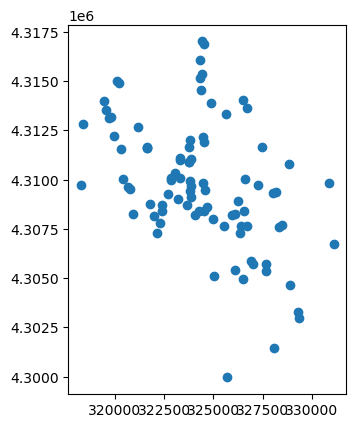

In [8]:
store_location_history.plot() #check if accessible to plot

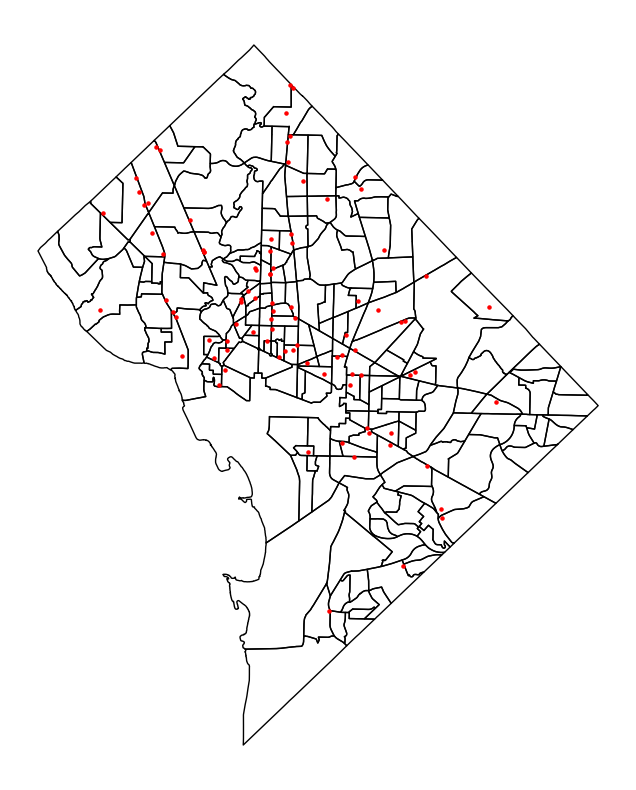

In [67]:
#Add DC tracts view to plot

fig, ax = plt.subplots(figsize=(10, 10))
ax = tracts.plot(ax=ax, facecolor='none', edgecolor='k', zorder=0)
store_location_history.plot(ax=ax, markersize=5, color='r', zorder=1)
ax.axis('off')

plt.savefig('large_scale_map.eps')

plt.show() #shows DC map with grocery store locations

In [69]:
#View variables of store_location_history 

print(store_location_history.columns.tolist())

['STORENAME', 'ADDRESS', 'ZIPCODE', 'PHONE', 'WARD', 'SSL', 'NOTES', 'PRESENT90', 'PRESENT95', 'PRESENT00', 'PRESENT05', 'PRESENT08', 'PRESENT09', 'PRESENT10', 'PRESENT11', 'PRESENT12', 'PRESENT13', 'PRESENT14', 'PRESENT15', 'PRESENT16', 'PRESENT17', 'PRESENT18', 'PRESENT22', 'PRESENT23', 'PRESENT24', 'PRESENT25', 'GIS_ID', 'XCOORD', 'YCOORD', 'MAR_ID', 'SE_ANNO_CAD_DATA', 'GLOBALID', 'CREATED', 'EDITED', 'OBJECTID', 'geometry', 'count_yes', 'count_no', 'count_blank', 'present_count', 'index_right', 'geoid']


In [70]:
#Create a present_all variable to combine all present instances

present_all = [
    'PRESENT90', 'PRESENT95', 'PRESENT00', 'PRESENT05', 'PRESENT08',
    'PRESENT09', 'PRESENT10', 'PRESENT11', 'PRESENT12', 'PRESENT13',
    'PRESENT14', 'PRESENT15', 'PRESENT16', 'PRESENT17', 'PRESENT18',
    'PRESENT22', 'PRESENT23', 'PRESENT24', 'PRESENT25'
]

In [71]:
#Make new columns for yes, no, blank count of PRESENTX column- instances. Each column will count a sum of all present instances from 1990-2025

# Yes counter
store_location_history['count_yes'] = (store_location_history[present_all] == 'Yes').sum(axis=1)

# No counter
store_location_history['count_no'] = (store_location_history[present_all] == 'No').sum(axis=1)

# Blank counter (covers all variations of blank, NA, None)
store_location_history['count_blank'] = (
    (store_location_history[present_all] == '') | (store_location_history[present_all].isna())
).sum(axis=1)


In [72]:
#Show new columns
store_location_history.head(20)

,STORENAME,ADDRESS,ZIPCODE,PHONE,WARD,SSL,NOTES,PRESENT90,PRESENT95,PRESENT00,...,CREATED,EDITED,OBJECTID,geometry,count_yes,count_no,count_blank,present_count,index_right,geoid
0,Target,7828 GEORGIA AVENUE NW,20012,2.028924e+09,Ward 4,2960 0017,None,None,None,None,...,2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,641,POINT (324433.836 4317005.729),4,0,15,19,29,14000US11001001600
1,International Progresso Market,7719 GEORGIA AVENUE NW,20012,2.025455e+09,Ward 4,2961 0810,None,None,None,None,...,2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,642,POINT (324510.63 4316893.912),4,0,15,19,193,14000US11001010300
2,Jocelyn’s Market,6404 GEORGIA AVENUE NW,20012,2.027228e+09,Ward 4,2945 0839,None,None,None,None,...,2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,643,POINT (324321.763 4315155.623),4,0,15,19,32,14000US11001001804
3,Magruder's,5626 CONNECTICUT AVENUE NW,20015,2.024645e+09,Ward 3,1860 0013,,Yes,Yes,Yes,...,2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,644,POINT (320100.028 4315004.464),19,0,0,19,21,14000US11001001100
4,Safeway,5545 CONNECTICUT AVENUE NW,20015,2.022446e+09,Ward 3,1867 0092,,No,Yes,Yes,...,2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,645,POINT (320231.888 4314895.688),18,1,0,19,26,14000US11001001401
5,Walmart Supercenter,5929 GEORGIA AVENUE NW,20011,2.027194e+09,Ward 4,2986 0039,Georgia Ave,No,No,No,...,2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,646,POINT (324352.157 4314522.805),10,9,0,19,33,14000US11001001901
6,Walmart Supercenter,310 RIGGS ROAD NE,20011,2.027564e+09,Ward 4,3748 0052,Riggs Road,No,No,No,...,2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,647,POINT (326520.569 4314019.401),8,11,0,19,165,14000US11001009505
7,Tropimart International Foods,607 KENNEDY STREET NW,20011,2.026273e+09,Ward 4,3207 0089,None,None,None,None,...,2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,648,POINT (324855.732 4313903.775),1,12,6,19,37,14000US11001002101
8,Rodman’s,5100 WISCONSIN AVENUE NW,20016,2.023633e+09,Ward 3,1656 0009,None,None,None,None,...,2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,649,POINT (319435.227 4313992.467),4,0,15,19,20,14000US11001001004
9,Avenue Supermarket,5010 1ST STREET NW,20011,2.027261e+09,Ward 4,3403 0806,None,None,None,None,...,2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,650,POINT (325616.276 4313304.402),4,0,15,19,40,14000US11001002202


In [73]:
#Just to double check number of years of data collection, make a counter column of count_yes, count_no, and count_blank. Add column to store_location_history

store_location_history['present_count'] = store_location_history[
    ['count_yes', 'count_no', 'count_blank']
].sum(axis=1)

In [74]:
#Check new column

store_location_history.head(4)
#Already knew 19 total years of present store data, just confirming this 

,STORENAME,ADDRESS,ZIPCODE,PHONE,WARD,SSL,NOTES,PRESENT90,PRESENT95,PRESENT00,...,CREATED,EDITED,OBJECTID,geometry,count_yes,count_no,count_blank,present_count,index_right,geoid
0,Target,7828 GEORGIA AVENUE NW,20012,2.028924e+09,Ward 4,2960 0017,None,None,None,None,...,2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,641,POINT (324433.836 4317005.729),4,0,15,19,29,14000US11001001600
1,International Progresso Market,7719 GEORGIA AVENUE NW,20012,2.025455e+09,Ward 4,2961 0810,None,None,None,None,...,2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,642,POINT (324510.63 4316893.912),4,0,15,19,193,14000US11001010300
2,Jocelyn’s Market,6404 GEORGIA AVENUE NW,20012,2.027228e+09,Ward 4,2945 0839,None,None,None,None,...,2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,643,POINT (324321.763 4315155.623),4,0,15,19,32,14000US11001001804
3,Magruder's,5626 CONNECTICUT AVENUE NW,20015,2.024645e+09,Ward 3,1860 0013,,Yes,Yes,Yes,...,2022-09-28 22:04:54+00:00,2025-01-14 19:33:19+00:00,644,POINT (320100.028 4315004.464),19,0,0,19,21,14000US11001001100


In [75]:
#Start code for choropleth map 

In [77]:
tracts.head(10) #to check if geoid included- yes. 

,name,B01003001,"B01003001, Error",geometry,count_yes,count_no,count_blank
geoid,,,,,,,
14000US11001000101,"Census Tract 1.01, District of Columbia, DC",1097.0,223.0,"MULTIPOLYGON (((321636.127 4308861.279, 321646...",3.0,0.0,16.0
14000US11001000102,"Census Tract 1.02, District of Columbia, DC",3127.0,474.0,"MULTIPOLYGON (((320559.301 4307779.45, 320608....",17.0,2.0,0.0
14000US11001000201,"Census Tract 2.01, District of Columbia, DC",2384.0,35.0,"MULTIPOLYGON (((319722.929 4309141.752, 319744...",0.0,0.0,0.0
14000US11001000202,"Census Tract 2.02, District of Columbia, DC",3919.0,461.0,"MULTIPOLYGON (((319647.92 4308298.985, 319649....",11.0,8.0,0.0
14000US11001000300,"Census Tract 3, District of Columbia, DC",5979.0,782.0,"MULTIPOLYGON (((319453.267 4310093.769, 319459...",0.0,0.0,0.0
14000US11001000400,"Census Tract 4, District of Columbia, DC",1652.0,331.0,"MULTIPOLYGON (((320287.465 4310786.758, 320288...",21.0,2.0,15.0
14000US11001000501,"Census Tract 5.01, District of Columbia, DC",3594.0,465.0,"MULTIPOLYGON (((321495.234 4309725.584, 321500...",0.0,0.0,0.0
14000US11001000502,"Census Tract 5.02, District of Columbia, DC",3384.0,524.0,"MULTIPOLYGON (((320884.458 4311145.747, 320886...",0.0,0.0,0.0
14000US11001000600,"Census Tract 6, District of Columbia, DC",4548.0,564.0,"MULTIPOLYGON (((320036.85 4312414.464, 320080....",0.0,0.0,0.0


In [78]:
#check tracts variables

print(tracts.columns.tolist())

['name', 'B01003001', 'B01003001, Error', 'geometry', 'count_yes', 'count_no', 'count_blank']


In [81]:
print(tracts.columns)
print(tracts.index.names)
#formatting for tracts as an index (geoid included but sometimes code says error not in index)

Index(['name', 'B01003001', 'B01003001, Error', 'geometry', 'count_yes',
       'count_no', 'count_blank'],
      dtype='object')
['geoid']


In [82]:
#sjoin of store_location_history and tracts 

store_location_history = store_location_history.sjoin(tracts[['geoid','geometry']])
tracts = tracts.set_index('geoid')

KeyError: "['geoid'] not in index"

In [85]:
#Double checking 'tracts' has 'geoid' as a column
tracts = tracts.reset_index()

#Spatial join (to resolve some issues with index_right and geoid)
if 'index_right' in store_location_history.columns:
    store_location_history = store_location_history.drop(columns=['index_right'])

store_location_history = store_location_history.sjoin(tracts[['geoid', 'geometry']], how='left')
print(store_location_history.columns)
print(store_location_history.head())

Index(['STORENAME', 'ADDRESS', 'ZIPCODE', 'PHONE', 'WARD', 'SSL', 'NOTES',
       'PRESENT90', 'PRESENT95', 'PRESENT00', 'PRESENT05', 'PRESENT08',
       'PRESENT09', 'PRESENT10', 'PRESENT11', 'PRESENT12', 'PRESENT13',
       'PRESENT14', 'PRESENT15', 'PRESENT16', 'PRESENT17', 'PRESENT18',
       'PRESENT22', 'PRESENT23', 'PRESENT24', 'PRESENT25', 'GIS_ID', 'XCOORD',
       'YCOORD', 'MAR_ID', 'SE_ANNO_CAD_DATA', 'GLOBALID', 'CREATED', 'EDITED',
       'OBJECTID', 'geometry', 'count_yes', 'count_no', 'count_blank',
       'present_count', 'geoid_left', 'geoid_right', 'index_right', 'geoid'],
      dtype='object')
                        STORENAME                     ADDRESS  ZIPCODE  \
0                         Target       7828 GEORGIA AVENUE NW    20012   
1  International Progresso Market      7719 GEORGIA AVENUE NW    20012   
2               Jocelyn’s Market       6404 GEORGIA AVENUE NW    20012   
3                      Magruder's  5626 CONNECTICUT AVENUE NW    20015   
4        

In [86]:
print(store_location_history.columns.tolist())
#checking columns 

['STORENAME', 'ADDRESS', 'ZIPCODE', 'PHONE', 'WARD', 'SSL', 'NOTES', 'PRESENT90', 'PRESENT95', 'PRESENT00', 'PRESENT05', 'PRESENT08', 'PRESENT09', 'PRESENT10', 'PRESENT11', 'PRESENT12', 'PRESENT13', 'PRESENT14', 'PRESENT15', 'PRESENT16', 'PRESENT17', 'PRESENT18', 'PRESENT22', 'PRESENT23', 'PRESENT24', 'PRESENT25', 'GIS_ID', 'XCOORD', 'YCOORD', 'MAR_ID', 'SE_ANNO_CAD_DATA', 'GLOBALID', 'CREATED', 'EDITED', 'OBJECTID', 'geometry', 'count_yes', 'count_no', 'count_blank', 'present_count', 'geoid_left', 'geoid_right', 'index_right', 'geoid']


In [87]:
print(store_location_history.index.names)
#checking what is under index (debugging)

[None]


In [88]:
#Drop leftover columns from earlier joins (debugging)
store_location_history = store_location_history.drop(columns=[
    'index_right', 'geoid_left', 'geoid_right'
], errors='ignore')

In [89]:
#Double check store_location_history is a GeoDataFrame (debugging)
assert isinstance(store_location_history, gpd.GeoDataFrame), "store_location_history must be a GeoDataFrame"
assert 'geometry' in store_location_history.columns, "store_location_history must have a geometry column"


In [90]:
#Ensure 'tracts' has 'geoid' and 'geometry' (debugging)
assert 'geoid' in tracts.columns and 'geometry' in tracts.columns, "tracts must have 'geoid' and 'geometry'"


In [91]:
#Spatial join
store_location_history = gpd.sjoin(
    store_location_history, 
    tracts[['geoid', 'geometry']], 
    how='left', 
    predicate='intersects'
)

In [92]:
#Confirm what columns were added
print("After sjoin, columns:", store_location_history.columns.tolist())

After sjoin, columns: ['STORENAME', 'ADDRESS', 'ZIPCODE', 'PHONE', 'WARD', 'SSL', 'NOTES', 'PRESENT90', 'PRESENT95', 'PRESENT00', 'PRESENT05', 'PRESENT08', 'PRESENT09', 'PRESENT10', 'PRESENT11', 'PRESENT12', 'PRESENT13', 'PRESENT14', 'PRESENT15', 'PRESENT16', 'PRESENT17', 'PRESENT18', 'PRESENT22', 'PRESENT23', 'PRESENT24', 'PRESENT25', 'GIS_ID', 'XCOORD', 'YCOORD', 'MAR_ID', 'SE_ANNO_CAD_DATA', 'GLOBALID', 'CREATED', 'EDITED', 'OBJECTID', 'geometry', 'count_yes', 'count_no', 'count_blank', 'present_count', 'geoid_left', 'index_right', 'geoid_right']


In [93]:
#Extract and rename 'geoid_right' from tracts (to correct if multiple of the same names)
if 'geoid_right' in store_location_history.columns:
    store_location_history['geoid'] = store_location_history['geoid_right']
else:
    raise ValueError("'geoid_right' not found after spatial join")

In [94]:
#Drop any leftover join columns again
store_location_history = store_location_history.drop(columns=['index_right', 'geoid_right'], errors='ignore')

In [95]:
#Double check 'geoid' is clean and one-dimensional
print("geoid dtype:", store_location_history['geoid'].dtype)
print(store_location_history[['geoid']].head())

geoid dtype: object
                geoid
0  14000US11001001600
1  14000US11001010300
2  14000US11001001804
3  14000US11001001100
4  14000US11001001401


In [96]:
#Group by geoid (Make a new variable to collect all three counts)
vote_counts = store_location_history.groupby('geoid')[['count_yes', 'count_no', 'count_blank']].sum()
#vote_counts is integer-sum of all counts, not redundant with present all, which is a string- combines all PRESENTX variables [not values]



In [97]:
#Merge into tracts
tracts = tracts.set_index('geoid')
tracts = tracts.join(vote_counts, how='left').fillna(0)

#occasional error of columns overlap but no suffix specified: Index(['count_yes', 'count_no', 'count_blank'], dtype='object') but map still works

ValueError: columns overlap but no suffix specified: Index(['count_yes', 'count_no', 'count_blank'], dtype='object')

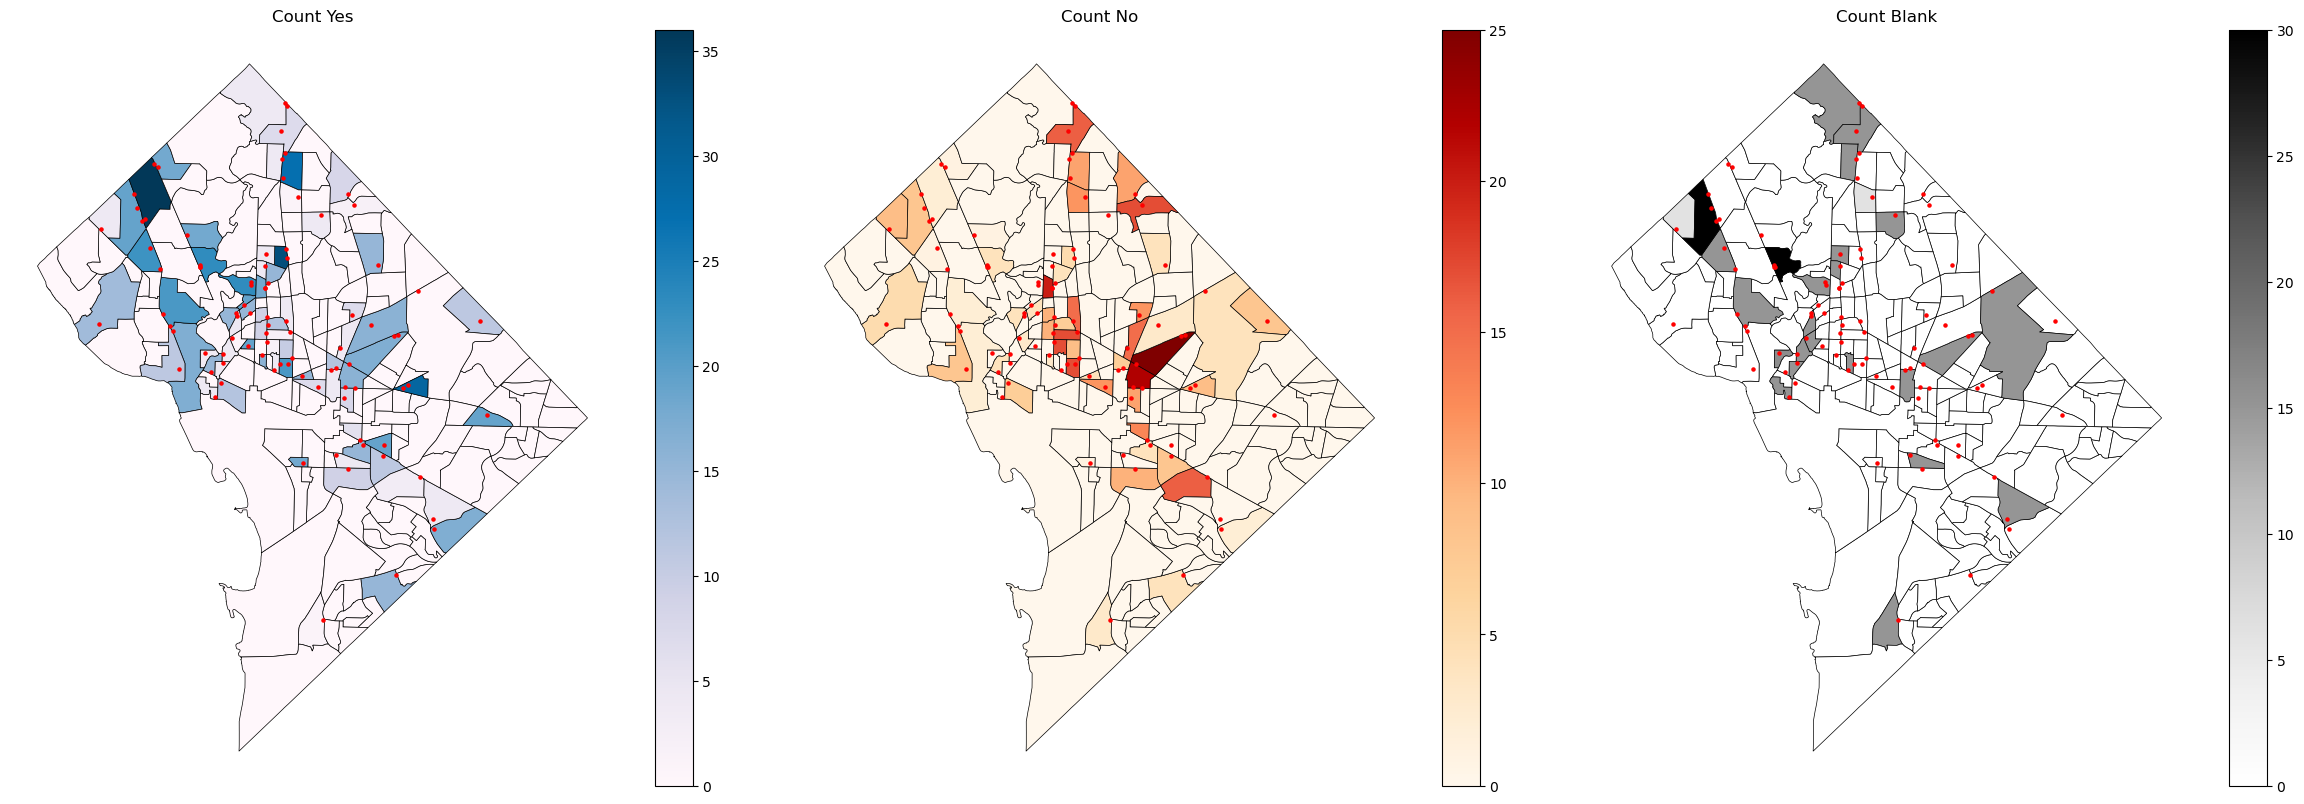

In [98]:
#Plot subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

tracts.plot(ax=ax1, column='count_yes', cmap='PuBu', linewidth=0.5, edgecolor='black', legend=True)
store_location_history.plot(ax=ax1, markersize=5, color='r', zorder=1)
ax1.set_title('Count Yes')
ax1.axis('off')

tracts.plot(ax=ax2, column='count_no', cmap='OrRd', linewidth=0.5, edgecolor='black', legend=True)
store_location_history.plot(ax=ax2, markersize=5, color='r', zorder=1)
ax2.set_title('Count No')
ax2.axis('off')

tracts.plot(ax=ax3, column='count_blank', cmap='Greys', linewidth=0.5, edgecolor='black', legend=True)
store_location_history.plot(ax=ax3, markersize=5, color='r', zorder=1)
ax3.set_title('Count Blank')
ax3.axis('off')

plt.tight_layout()
plt.savefig('three_map_comparison.eps')
plt.show()


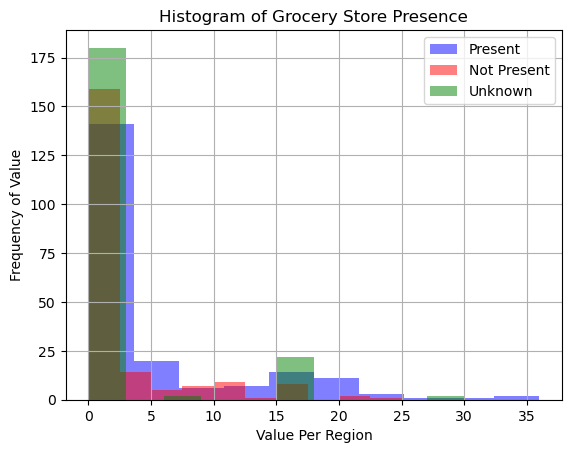

In [100]:
#Histogram of Choropleth Map

# Plot each histogram with label and color
tracts.count_yes.hist(label='Present', color='blue', alpha=0.5)#yes
tracts.count_no.hist(label='Not Present', color='red', alpha=0.5) #no
tracts.count_blank.hist(label='Unknown', color='green', alpha=0.5) #blank

# Title and labels
plt.title('Histogram of Grocery Store Presence')
plt.xlabel('Value Per Region')
plt.ylabel('Frequency of Value')

# Show legend
plt.legend()

# Show plot
plt.show()


In [101]:
print(tracts.count_yes.describe())
print(tracts.count_yes.head())

count    206.000000
mean       4.189320
std        7.402576
min        0.000000
25%        0.000000
50%        0.000000
75%        4.000000
max       36.000000
Name: count_yes, dtype: float64
geoid
14000US11001000101     3.0
14000US11001000102    17.0
14000US11001000201     0.0
14000US11001000202    11.0
14000US11001000300     0.0
Name: count_yes, dtype: float64


In [102]:
#Find total sum of yes, no, blank counts 

In [103]:
store_location_history['count_yes'].sum()
#863

863

In [104]:
store_location_history['count_no'].sum()
#463

463

In [105]:
store_location_history['count_blank'].sum()
#403

403

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


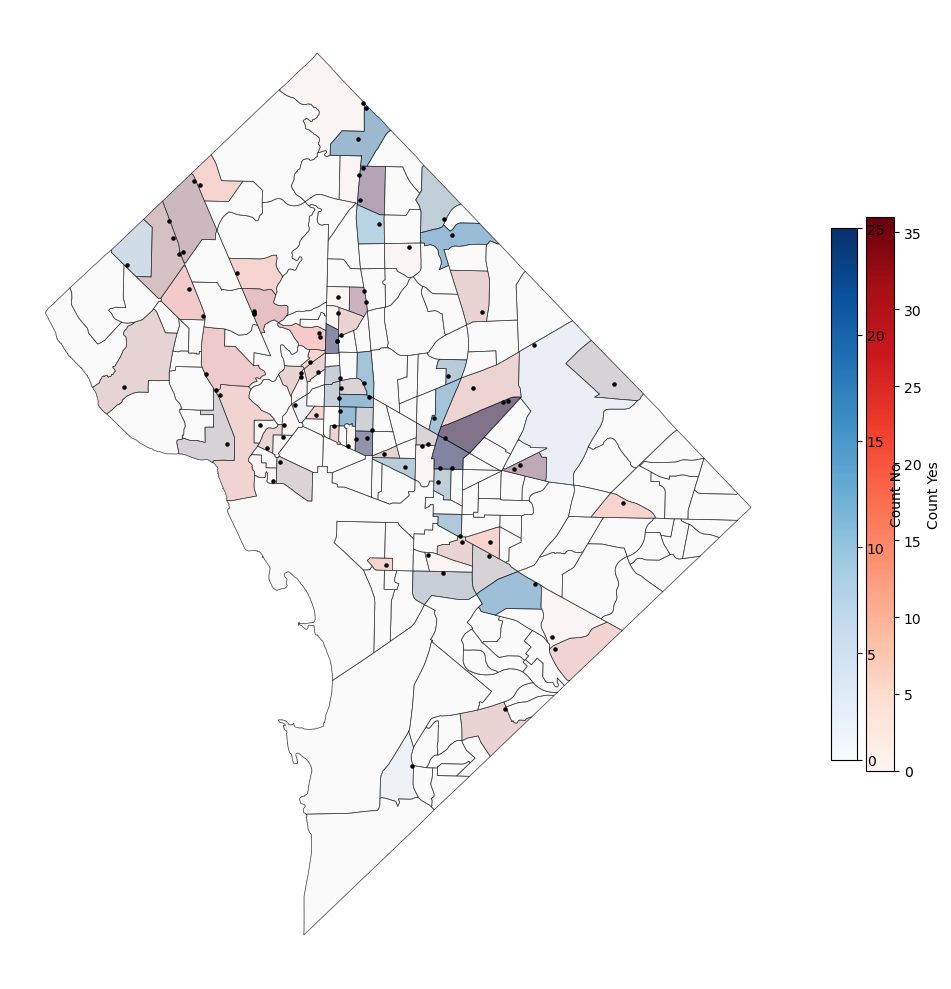

In [31]:
#Just for reference, looking into tracking multiple colors on the same map; limitations with pandas and gdf color compatability

fig, ax = plt.subplots(figsize=(10, 10))

# Define normalizations explicitly
norm_yes = mpl.colors.Normalize(vmin=tracts['count_yes'].min(), vmax=tracts['count_yes'].max())
norm_no = mpl.colors.Normalize(vmin=tracts['count_no'].min(), vmax=tracts['count_no'].max())

# Plot using explicit norms
tracts.plot(ax=ax, column='count_yes', cmap='Reds', norm=norm_yes, linewidth=0.5, edgecolor='black', alpha=0.5)
tracts.plot(ax=ax, column='count_no', cmap='Blues', norm=norm_no, linewidth=0.5, edgecolor='black', alpha=0.5)

# Store locations
store_location_history.plot(ax=ax, markersize=5, color='black', zorder=2)

ax.axis('off')

# Create ScalarMappables with matching norms
sm_yes = mpl.cm.ScalarMappable(cmap='Reds', norm=norm_yes)
sm_no = mpl.cm.ScalarMappable(cmap='Blues', norm=norm_no)
sm_yes._A = []
sm_no._A = []

# Add matching colorbars
cbar_yes = fig.colorbar(sm_yes, ax=ax, orientation='vertical', fraction=0.03, pad=0.01)
cbar_yes.set_label('Count Yes')

cbar_no = fig.colorbar(sm_no, ax=ax, orientation='vertical', fraction=0.03, pad=0.05)
cbar_no.set_label('Count No')

plt.tight_layout()
plt.savefig('overlaid_map_with_matching_legends.eps')
plt.show()






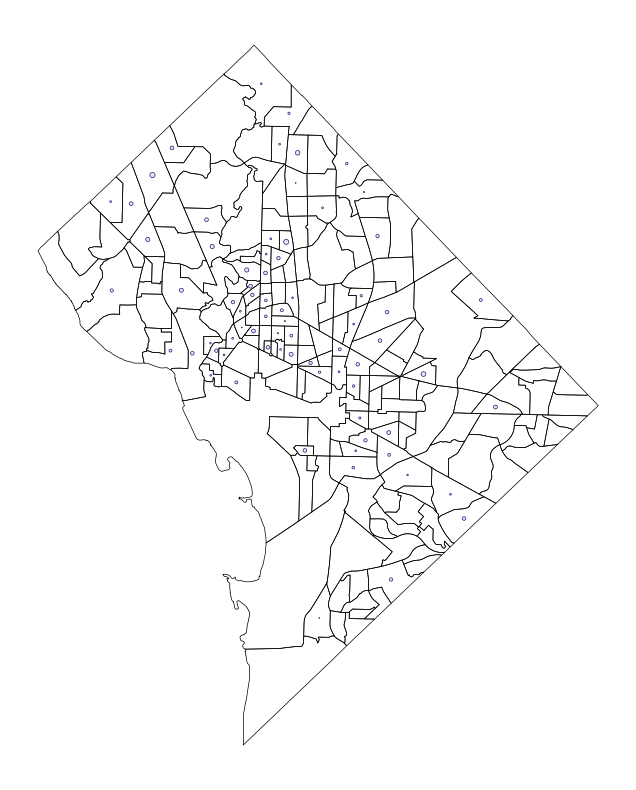

In [33]:
#Also just for reference, Proportional Symbol Map


tract_points = tracts.copy()
tract_points['geometry'] = tract_points.centroid

def proportional_circles_radii(values, multiplier=1):
    return np.sqrt(values / 3.14) * multiplier

fig, ax = plt.subplots(figsize=(10, 10))
ax = tracts.plot(ax=ax, facecolor='none', edgecolor='black', zorder=0, linewidth=0.5)

tract_points.buffer(proportional_circles_radii(tract_points['count_yes'], 25)).plot(
    ax=ax, 
    zorder=1, 
    facecolor='lavender', 
    edgecolor='midnightblue', 
    linewidth=0.5)
# affordable_housing.plot(ax=ax, markersize=1, color='darkblue', zorder=2)
ax.axis('off')

plt.savefig('large_scale_map.eps')

plt.show()
